## 之前的例子

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import random
random.seed(666)

In [4]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 5, size=100)

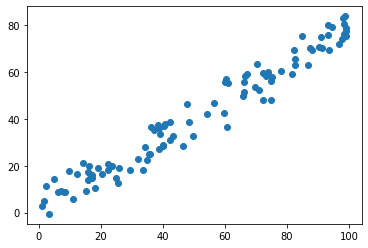

In [5]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

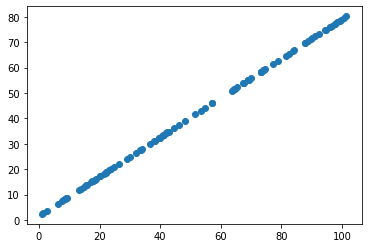

In [8]:
plt.scatter(X_restore[:,0], X_restore[:,1])
plt.show()

## 手写识别的例子

In [9]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [10]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [11]:
example_digits = noisy_digits[y == 0,:][:10]
for num in range(1, 10):
    X_num = noisy_digits[y == num,:][:10]
    example_digits = np.vstack([example_digits, X_num])

In [12]:
example_digits.shape

(100, 64)

In [17]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                 cmap='binary', interpolation='nearest',
                 clim=(0, 16))
    plt.show()

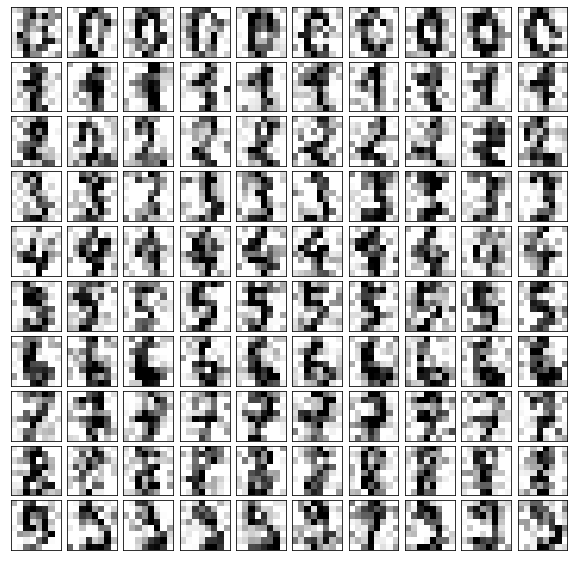

In [18]:
plot_digits(example_digits)

In [19]:
pca = PCA(0.5)
pca.fit(noisy_digits)
example_digits_reduction = pca.transform(example_digits)

In [20]:
filtered_digits = pca.inverse_transform(example_digits_reduction)

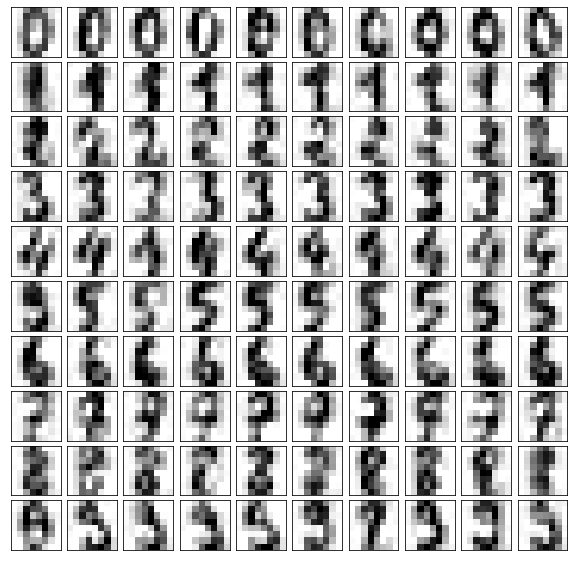

In [21]:
plot_digits(filtered_digits)